# DAS data iterator

This is a simple example that shows the application of the iterator. 

Let's first download some FORGE data. 
Use this script from your shell to download DAS data into a subfolder called 'Data' (or another name, and change configuration file config_general accordingly). The first and last file are considered invalid, because they cannot be properly buffered, and are thus not plotted.

wget -q https://pando-rgw01.chpc.utah.edu/silixa_das_apr_26_2019/FORGE_78-32_iDASv3-P11_UTC190426064823.sgy <br>
wget -q https://pando-rgw01.chpc.utah.edu/silixa_das_apr_26_2019/FORGE_78-32_iDASv3-P11_UTC190426064838.sgy <br>
wget -q https://pando-rgw01.chpc.utah.edu/silixa_das_apr_26_2019/FORGE_78-32_iDASv3-P11_UTC190426064853.sgy <br>
wget -q https://pando-rgw01.chpc.utah.edu/silixa_das_apr_26_2019/FORGE_78-32_iDASv3-P11_UTC190426064908.sgy <br>
wget -q https://pando-rgw01.chpc.utah.edu/silixa_das_apr_26_2019/FORGE_78-32_iDASv3-P11_UTC190426064923.sgy <br>
wget -q https://pando-rgw01.chpc.utah.edu/silixa_das_apr_26_2019/FORGE_78-32_iDASv3-P11_UTC190426064938.sgy <br>

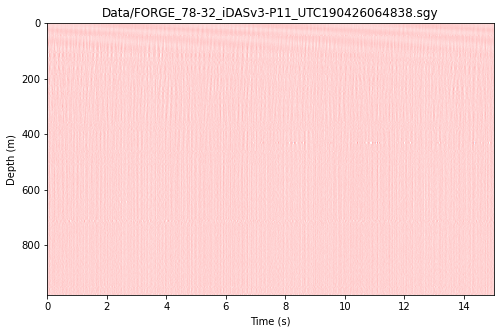

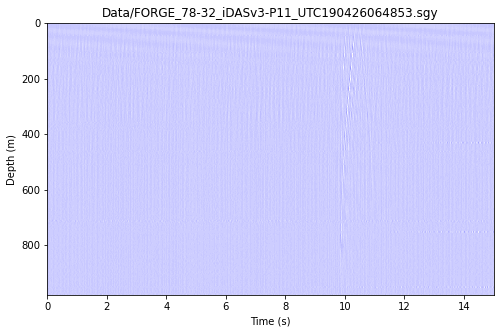

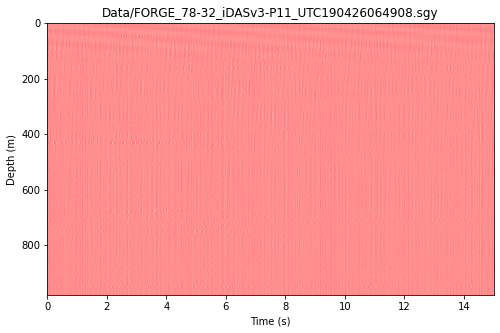

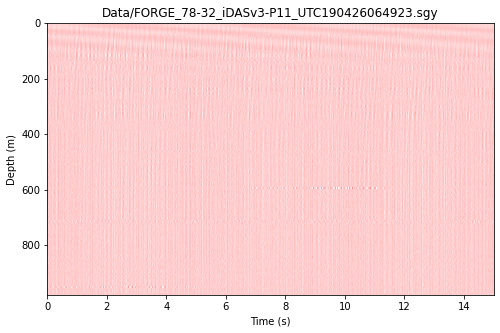

In [1]:
import config_general as cfg
import data_streaming as stream
import matplotlib.pyplot as plt

def plot_seismic_horiz(data, dx, dt):
    nch, nt = data.shape
    plt.figure(figsize=(8,5))
    plt.imshow(data, aspect='auto', cmap='seismic', extent=(0, (nt-1)*dt, (nch-1)*dx, 0))
    plt.ylabel('Depth (m)')
    plt.xlabel('Time (s)')

data_iter = stream.DataIterator(proc_steps=cfg.proc_steps, folder_name=cfg.data_path,
                                    db_name=cfg.events_db_name, output_overlap=cfg.overlap_samples)
plt.close('all')
for curr_chunk in data_iter:
    if curr_chunk.check_validity():
        plot_seismic_horiz(curr_chunk.data, cfg.d_chan, cfg.dt)
        plt.title(curr_chunk.filename)
        plt.show()
        if 'FORGE_78-32_iDASv3-P11_UTC190426064853.sgy' in curr_chunk.filename:
            saved_data = curr_chunk.data[:,18000:22000]



You can see that for the second file, there's a pretty cool earthquake around 10 seconds!
Let's zoom on it (after we saved the data). You can see that the pre-processing we applied here (defined in config_general.py, and includes median filtering, clipping, band-pass filtering, and trace-by-trace normalization) does a good job cleaning up the data.

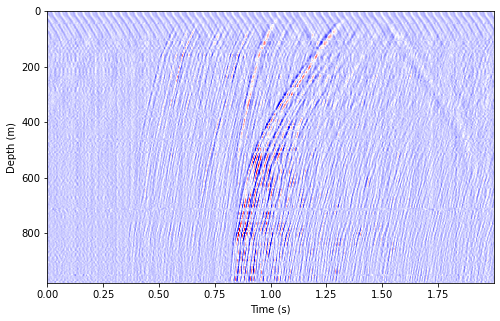

In [2]:
plot_seismic_horiz(saved_data, cfg.d_chan, cfg.dt)